<a href="https://colab.research.google.com/github/shahbashajahan/ml-ict/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl http://www.codeheroku.com/static/workshop/datasets/student_scores.csv -o student_scores.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   243  100   243    0     0   1227      0 --:--:-- --:--:-- --:--:--  1227


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("student_scores.csv")
df

,Hours,Scores,Pass
0,2.3,18,0
1,5.0,45,1
2,3.2,25,0
3,8.5,72,1
4,3.5,30,0
5,1.5,20,0
6,9.2,88,1
7,5.5,60,1
8,8.3,81,1
9,2.7,25,0


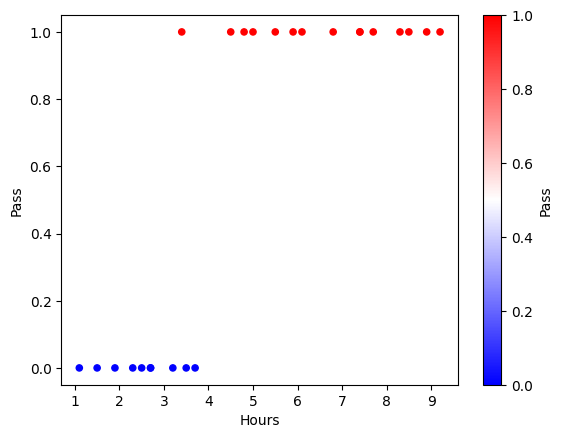

In [6]:
x = df["Hours"]
y = df["Pass"]
df.plot.scatter(x="Hours",y="Pass",c="Pass",colormap='bwr')
plt.show()

In [8]:
def sigmoid(z):

    return 1 / (1+ np.exp(-z))

In [10]:
def logistic_regression(all_x,all_y,m,b):
    for x,y_actual in zip(all_x,all_y):
        y_pred = sigmoid(m*x+b)
        error = y_pred - y_actual

        delta_m = -1 * (error * x) * 0.05
        delta_b = -1 * (error) * 0.05

        m = m + delta_m
        b = b + delta_b

    return m,b

In [12]:
m = 0
b = 0
for i in range(0,100):
    m,b = logistic_regression(x,y,m,b)
m,b

(1.5493633083078429, -5.8807083566516765)

In [14]:
### Helper function use when needed
def get_sigmoid(X,m,b):
    sig = []
    for x in X.values:
        y = sigmoid(m*x + b)
        sig.append(y)

    return sig

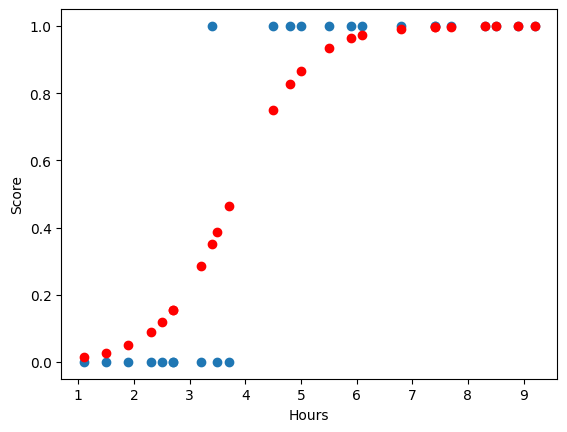

In [16]:
plt.plot(x,y,'o')
plt.xlabel("Hours")
plt.ylabel("Score")

sig = get_sigmoid(x,m,b)
plt.plot(x,sig,'ro')
plt.show()

In [17]:
def predict(x,m,b):
    y = sigmoid(m*x + b)

    if y > 0.5:
        return 1
    else:
        return 0

df["Predictions"] = df.apply(lambda row: predict(row["Hours"],m,b),axis=1)
df

,Hours,Scores,Pass,Predictions
0,2.3,18,0,0
1,5.0,45,1,1
2,3.2,25,0,0
3,8.5,72,1,1
4,3.5,30,0,0
5,1.5,20,0,0
6,9.2,88,1,1
7,5.5,60,1,1
8,8.3,81,1,1
9,2.7,25,0,0
